## #1 Importing libraries

In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset
**Adjusting each dataset to be only related to Provence-Alpes-Côte d'Azur**
- Hotel nights for regions bordering Provence-Alpes-Côte d'Azur
- Weather for regions bordering Provence-Alpes-Côte d'Azur
- Gross regional product
- Days off

Region | 
--- | 
Provence-Alpes-Côte d'Azur |
Occitanie | 
Corse | 
Auvergne-Rhône-Alpes |

In [2]:
data_nights = pd.read_csv('/Users/jinny/Documents/touristcast/datasets/nights_2010-2017.csv')
data_nights = data_nights.drop('Unnamed: 0', axis=1)
data_nights

nights_PAC = data_nights[['date', 'nights_PAC', 'nights_OCC', 'nights_COR', 'nights_ARA']]
nights_PAC['date'].apply(pd.to_datetime)
nights_PAC = nights_PAC.set_index('date')

nights_PAC

nights_PAC = nights_PAC.sort_values(by='date')
# print(nights_PAC.info())
# nights_PAC.head()

In [3]:
data_temp = pd.read_csv('/Users/jinny/Documents/touristcast/datasets/avgtemp_2010-2017.csv')
data_temp = data_temp.drop('Unnamed: 0', axis=1)
data_temp

avgtemp_PAC = data_temp[['date', 'avgtemp_PAC', 'avgtemp_OCC', 'avgtemp_COR', 'avgtemp_ARA']]
avgtemp_PAC['date'].apply(pd.to_datetime)
avgtemp_PAC = avgtemp_PAC.set_index('date')

avgtemp_PAC

avgtemp_PAC = avgtemp_PAC.sort_values(by='date')
print(avgtemp_PAC.info())
avgtemp_PAC.head()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 2010-01-01 to 2017-12-01
Data columns (total 4 columns):
avgtemp_PAC    96 non-null float64
avgtemp_OCC    96 non-null float64
avgtemp_COR    96 non-null float64
avgtemp_ARA    96 non-null float64
dtypes: float64(4)
memory usage: 3.8+ KB
None


,avgtemp_PAC,avgtemp_OCC,avgtemp_COR,avgtemp_ARA
date,,,,
2010-01-01,5.0,4.129311,10.0,-0.474291
2010-02-01,7.0,5.129311,11.0,1.525709
2010-03-01,9.0,7.752874,12.0,4.525709
2010-04-01,14.0,13.752874,15.0,10.262854
2010-05-01,17.0,15.129311,18.0,12.000000


In [4]:
# In terminal: pip install pytemperature
import pytemperature

avgtemp_k_PAC = pytemperature.c2k(avgtemp_PAC)
avgtemp_k_PAC.head()

,avgtemp_PAC,avgtemp_OCC,avgtemp_COR,avgtemp_ARA
date,,,,
2010-01-01,278.15,277.279311,283.15,272.675709
2010-02-01,280.15,278.279311,284.15,274.675709
2010-03-01,282.15,280.902874,285.15,277.675709
2010-04-01,287.15,286.902874,288.15,283.412854
2010-05-01,290.15,288.279311,291.15,285.150000


In [5]:
data_daysoff = pd.read_csv('/Users/jinny/Documents/touristcast/datasets/daysoff_2010-2017.csv', index_col='date')
data_daysoff = data_daysoff.drop('Unnamed: 0', axis=1)
data_daysoff.head()

,daysoff
date,
2010-01-01,11
2010-02-01,9
2010-03-01,9
2010-04-01,10
2010-05-01,12


In [6]:
data_gdp = pd.read_csv('/Users/jinny/Documents/touristcast/datasets/regionalGDP_2010-2015.csv')
data_gdp = data_gdp.drop('Unnamed: 0', axis=1)
data_gdp

gdp_PAC = data_gdp[['date', 'gdp_PAC', 'gdp_OCC', 'gdp_COR', 'gdp_ARA']]
gdp_PAC['date'].apply(pd.to_datetime)
gdp_PAC = gdp_PAC.set_index('date')

gdp_PAC

gdp_PAC = gdp_PAC.sort_values(by='date')
print(gdp_PAC.info())
gdp_PAC.head()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 2010-01-01 to 2015-12-01
Data columns (total 4 columns):
gdp_PAC    72 non-null float64
gdp_OCC    72 non-null float64
gdp_COR    72 non-null float64
gdp_ARA    72 non-null float64
dtypes: float64(4)
memory usage: 2.8+ KB
None


,gdp_PAC,gdp_OCC,gdp_COR,gdp_ARA
date,,,,
2010-01-01,143112.575866,140183.733846,7923.515907,225165.722898
2010-02-01,143112.575866,140183.733846,7923.515907,225165.722898
2010-03-01,143112.575866,140183.733846,7923.515907,225165.722898
2010-04-01,143112.575866,140183.733846,7923.515907,225165.722898
2010-05-01,143112.575866,140183.733846,7923.515907,225165.722898


In [7]:
data_PAC_zone = pd.concat([nights_PAC, avgtemp_k_PAC, data_daysoff, gdp_PAC], axis=1, sort=False)
data_PAC_zone.index = pd.to_datetime(data_PAC_zone.index)
data_PAC_zone_train = data_PAC_zone.dropna(axis=0, how='any')
print(data_PAC_zone_train.info())
data_PAC_zone_train.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2010-01-01 to 2015-12-01
Data columns (total 13 columns):
nights_PAC     72 non-null float64
nights_OCC     72 non-null float64
nights_COR     72 non-null float64
nights_ARA     72 non-null float64
avgtemp_PAC    72 non-null float64
avgtemp_OCC    72 non-null float64
avgtemp_COR    72 non-null float64
avgtemp_ARA    72 non-null float64
daysoff        72 non-null int64
gdp_PAC        72 non-null float64
gdp_OCC        72 non-null float64
gdp_COR        72 non-null float64
gdp_ARA        72 non-null float64
dtypes: float64(12), int64(1)
memory usage: 7.9 KB
None


,nights_PAC,nights_OCC,nights_COR,nights_ARA,avgtemp_PAC,avgtemp_OCC,avgtemp_COR,avgtemp_ARA,daysoff,gdp_PAC,gdp_OCC,gdp_COR,gdp_ARA
2010-01-01,956.88,630.13,30.95,1658.40,278.15,277.279311,283.15,272.675709,11,143112.575866,140183.733846,7923.515907,225165.722898
2010-02-01,1114.93,772.10,40.01,2020.37,280.15,278.279311,284.15,274.675709,9,143112.575866,140183.733846,7923.515907,225165.722898
2010-03-01,1327.84,884.48,50.37,2059.83,282.15,280.902874,285.15,277.675709,9,143112.575866,140183.733846,7923.515907,225165.722898
2010-04-01,1727.31,1351.76,185.57,1650.53,287.15,286.902874,288.15,283.412854,10,143112.575866,140183.733846,7923.515907,225165.722898
2010-05-01,2066.52,1642.23,399.97,1530.91,290.15,288.279311,291.15,285.150000,12,143112.575866,140183.733846,7923.515907,225165.722898


In [8]:
data_PAC_zone_train_notemp = data_PAC_zone_train.drop(['avgtemp_PAC', 'avgtemp_OCC', 'avgtemp_COR', 'avgtemp_ARA'], axis=1)
data_PAC_zone_train_notemp.head()

,nights_PAC,nights_OCC,nights_COR,nights_ARA,daysoff,gdp_PAC,gdp_OCC,gdp_COR,gdp_ARA
2010-01-01,956.88,630.13,30.95,1658.40,11,143112.575866,140183.733846,7923.515907,225165.722898
2010-02-01,1114.93,772.10,40.01,2020.37,9,143112.575866,140183.733846,7923.515907,225165.722898
2010-03-01,1327.84,884.48,50.37,2059.83,9,143112.575866,140183.733846,7923.515907,225165.722898
2010-04-01,1727.31,1351.76,185.57,1650.53,10,143112.575866,140183.733846,7923.515907,225165.722898
2010-05-01,2066.52,1642.23,399.97,1530.91,12,143112.575866,140183.733846,7923.515907,225165.722898


### Stationarity check


In [9]:
from statsmodels.tsa.stattools import adfuller

for column in data_PAC_zone_train.columns:
    result = adfuller(data_PAC_zone_train[column])
#     print(f'Stationarity test for variable {column}')
#     print('ADF Statistic: %f' % result[0])
#     print('p-value: %f' % result[1])
#     print('Critical Values:')

#     for key, value in result[4].items():
#         print('\t%s: %.3f' % (key, value))
    
    if result[1] < 0.05:
        print(f'{column}')
        print('Stationary')
        print('-------')

daysoff
Stationary
-------


Result:
- Nights, AvgTemp, GDP are all non-stationary
- Daysoff is stationary (also doesn't require forecasting as we already have the answers)

#### Figure out which series' seasonality is additive or multiplicative

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# ----- Additive Model below -----

add_data = seasonal_decompose(data_PAC_zone_train, model='additive')  

add_trend = add_data.trend.dropna()
add_seasonal = add_data.seasonal.dropna()
add_residual = add_data.resid.dropna()

# stationarity_test(add_residual)

# ----- Multiplicative Model below -----

mult_data = seasonal_decompose(data_PAC_zone_train, model='multiplicative')  

mult_trend = mult_data.trend.dropna()
mult_seasonal = mult_data.seasonal.dropna()
mult_residual = mult_data.resid.dropna()

# stationarity_test(mult_residual)

In [11]:
from statsmodels.tsa.stattools import acf

add_acfs = add_residual.apply(acf, axis=0).apply(np.square, axis=0).apply(np.sum)

mult_acfs = mult_residual.apply(acf, axis=0).apply(np.square, axis=0).apply(np.sum)

additive = add_acfs < mult_acfs
add_cols = additive.index[additive].tolist()
mult_cols = additive.index[~additive].tolist()
print('Additive:', add_cols)
print('Multiplicative', mult_cols)

Additive: ['avgtemp_OCC', 'daysoff']
Multiplicative ['nights_PAC', 'nights_OCC', 'nights_COR', 'nights_ARA', 'avgtemp_PAC', 'avgtemp_COR', 'avgtemp_ARA', 'gdp_PAC', 'gdp_OCC', 'gdp_COR', 'gdp_ARA']


> Nights in PAC is a multiplicative time series

### Forecasting the 3 parts: Seasonal, Trend, and Residuals

#### Seasonal forecasts for 2016 (nights only)
- Seasonal naive forecast method: Taking the same seasonal data as 2015

In [12]:
mult_seasonal_2016 = mult_seasonal[(mult_seasonal.index>='2015-01-01')&(mult_seasonal.index<'2016-01-01')]
mult_seasonal_2016 = mult_seasonal_2016[['nights_PAC']]
mult_seasonal_2016.head()

,nights_PAC
2015-01-01,0.504709
2015-02-01,0.585774
2015-03-01,0.753537
2015-04-01,0.952641
2015-05-01,1.167660


#### Trend forecasts for 2016 (nights only)
- non-seasonal forecasting methods ex. ARIMA or Holt's

In [13]:
from pyramid.arima import auto_arima
arima_trend = auto_arima(np.array(mult_trend.nights_PAC), start_p=0, start_q=0, max_p=10, max_q=10, m=12,
                    start_P=0, max_P=10, seasonal=False, d=1, D=1, trace=True,
                    error_action='ignore', suppress_warnings=True, stepwise=False, random=True, random_state=42) 

arima_trend.summary()

Fit ARIMA: order=(6, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(8, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=386.432, BIC=390.587, Fit time=0.036 seconds
Fit ARIMA: order=(5, 1, 0); AIC=333.072, BIC=347.615, Fit time=0.224 seconds
Fit ARIMA: order=(0, 1, 5); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(9, 1, 0); AIC=337.305, BIC=360.158, Fit time=0.949 seconds
Fit ARIMA: order=(1, 1, 5); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1); AIC=327.398, BIC=335.708, Fit time=0.108 seconds
Fit ARIMA: order=(10, 1, 0); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 0); AIC=338.841, BIC=349.229, Fit time=0.090 seconds
Total fit time: 1.477 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   59
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -159.699
Method:                       css-mle   S.D. of innovations              3.480
Date:                Sun, 19 Aug 2018   AIC                            327.398
Time:                        23:14:25   BIC                            335.708
Sample:                             1   HQIC                           330.642
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1898      1.382      0.861      0.393      -1.518       3.898
ar.L1.D.y      0.3554      0.121      2.943      0.005       0.119       0.592
ma.L1.D.y      0.9999      0.067     14.886      0.000       0.868       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.8134           +0.0000j            2.8134            0.0000
MA.1           -1.0001           +0.0000j            1.0001            0.5000
-----------------------------------------------------------------------------
"""

In [14]:
arima_trend.fit(mult_trend.nights_PAC)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [15]:
arima_trend_forecast_2016 = arima_trend.predict(n_periods=12)
arima_trend_forecast_2016

array([1846.45350717, 1846.792287  , 1847.67958289, 1848.76184506,
       1849.91340664, 1851.08960023, 1852.2745491 , 1853.46260997,
       1854.65177698, 1855.84133717, 1857.0310371 , 1858.2207867 ])

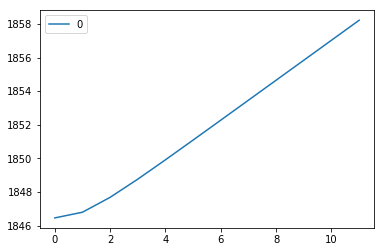

In [16]:
arima_trend_forecast_2016_df = pd.DataFrame(arima_trend_forecast_2016)
arima_trend_forecast_2016_df.plot()

#### Residual forecasts for 2016 (produces forecasts for all but we will use nights forecast only)
- VAR model
- Takes all variables into account and gives predictions for all
- We will be taking the VAR prediction for nights_PAC only

In [44]:
mult_residual.tail()

,nights_PAC,nights_OCC,nights_COR,nights_ARA,avgtemp_PAC,avgtemp_OCC,avgtemp_COR,avgtemp_ARA,daysoff,gdp_PAC,gdp_OCC,gdp_COR,gdp_ARA
2015-02-01,1.028439,1.033065,0.895000,1.038245,0.997767,0.993871,0.995604,0.996108,0.924216,1.000940,0.999532,1.003338,1.000954
2015-03-01,0.962181,1.005782,0.834071,0.968626,0.996781,0.995529,0.996163,0.997082,0.920902,1.000729,0.999632,1.002587,1.000738
2015-04-01,1.029883,1.011090,0.849661,1.003988,0.998573,1.000630,0.999307,0.998115,0.998196,1.000518,0.999731,1.001837,1.000522
2015-05-01,1.028570,1.031888,1.005875,1.028856,1.004455,1.004565,1.004677,1.003391,1.183159,1.000305,0.999827,1.001090,1.000304
2015-06-01,0.992281,0.965796,0.992652,0.990948,1.005530,1.006592,1.004295,1.004619,0.901985,1.000092,0.999922,1.000345,1.000085


In [49]:
from statsmodels.tsa.api import VAR, DynamicVAR

model = VAR(mult_residual, dates=mult_residual.index)

lagorder_results = model.select_order(2)
print(lagorder_results.summary())

results = model.fit(maxlags=2, ic='aic')
print(results.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -139.2     -138.8*   3.418e-61      -139.0
1      -139.9      -133.4   2.067e-61      -137.3
2     -144.6*      -132.1  4.573e-63*     -139.7*
-------------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 19, Aug, 2018
Time:                     23:18:20
--------------------------------------------------------------------
No. of Equations:         13.0000    BIC:                   -132.083
Nobs:                     58.0000    HQIC:                  -139.695
Log likelihood:           3473.13    FPE:                4.57258e-63
AIC:                     -144.552    Det(Omega_mle):     3.17892e-65
--------------------------------------------------------------------
Results for equation nights_PAC
                    coefficie

/Users/jinny/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [50]:
lag_order = results.k_ar
lag_order

mult_resid_forecast_2016 = results.forecast(mult_residual.values[-lag_order:], 12)
mult_resid_forecast_2016

array([[1.02903191, 1.01132407, 1.07897127, 1.01455001, 1.00281165,
        1.00213595, 1.00311244, 1.00205433, 0.96505077, 1.00113968,
        0.99938959, 0.99984365, 0.99923672],
       [0.99208701, 1.00346196, 0.97936122, 0.99516806, 0.99739948,
        0.99473519, 0.99934619, 0.99578459, 1.05511492, 1.00245517,
        1.00084187, 1.00100889, 1.0005014 ],
       [0.99712987, 0.99187014, 1.00581403, 0.99542525, 0.99720595,
        0.99624327, 0.99739066, 0.99656413, 1.00746357, 1.00002125,
        1.00008264, 1.00050303, 1.00024632],
       [1.01050389, 0.99479906, 1.04299676, 1.00567817, 0.99947394,
        1.00095915, 0.99916588, 0.99980632, 1.01297882, 1.00013105,
        1.00026728, 1.00072205, 1.00057576],
       [0.98545073, 0.9929164 , 1.0117649 , 1.00082256, 1.00240912,
        1.00309733, 1.00138908, 1.00350365, 0.9791849 , 1.00022686,
        1.00113571, 1.00048903, 1.00115836],
       [0.98527497, 0.99286626, 0.99913303, 0.9849644 , 1.00066119,
        1.00084685, 1.00095

In [51]:
mult_resid_forecast_2016_df = pd.DataFrame(mult_resid_forecast_2016)
mult_resid_forecast_2016_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.029032,1.011324,1.078971,1.014550,1.002812,1.002136,1.003112,1.002054,0.965051,1.001140,0.999390,0.999844,0.999237
1,0.992087,1.003462,0.979361,0.995168,0.997399,0.994735,0.999346,0.995785,1.055115,1.002455,1.000842,1.001009,1.000501
2,0.997130,0.991870,1.005814,0.995425,0.997206,0.996243,0.997391,0.996564,1.007464,1.000021,1.000083,1.000503,1.000246
3,1.010504,0.994799,1.042997,1.005678,0.999474,1.000959,0.999166,0.999806,1.012979,1.000131,1.000267,1.000722,1.000576
4,0.985451,0.992916,1.011765,1.000823,1.002409,1.003097,1.001389,1.003504,0.979185,1.000227,1.001136,1.000489,1.001158


#### Putting the decomposed forecasts back together (additive; nights only)


In [52]:
mult_seasonal_2016_array = mult_seasonal_2016.nights_PAC.values
mult_seasonal_2016_df = pd.DataFrame(mult_seasonal_2016_array)
mult_seasonal_2016_df.head(2)

,0
0,0.504709
1,0.585774


In [53]:
forecast_2016 = mult_seasonal_2016_df[0] * arima_trend_forecast_2016_df[0] * mult_resid_forecast_2016_df[0]
forecast_2016

0      958.976326
1     1073.243158
2     1388.299697
3     1779.705047
4     2128.642993
5     2420.617086
6     3119.708587
7     3380.802500
8     2358.939438
9     1683.552073
10     986.020813
11     946.152163
Name: 0, dtype: float64

In [56]:
nights_PAC_2016 = nights_PAC[(nights_PAC.index>='2016-01-01')&(nights_PAC.index<'2017-01-01')]
nights_PAC_2016 = np.array(nights_PAC_2016.nights_PAC)
nights_PAC_2016_df = pd.DataFrame(nights_PAC_2016)

In [57]:
results.aic

-144.5519672941812

In [58]:
# Define seasonality as 12 (monthly data) in argument when ground truth data includes at least 24 months

def seasonal_MASE(truth, forecast, seasonality=1):    
    period = truth.shape[0] # T
    # print(period)
    forecast_errors = np.abs(truth - forecast)
    # print(forecast_errors)
    mean_absolute_forecast_error = np.sum(forecast_errors) / period
    # print(mean_absolute_forecast_error)

    naive_period = truth.shape[0] - seasonality # T - m
    # print(naive_period)
    # print(truth[seasonality:])
    # print(truth[:period - seasonality])
    naive_errors = np.abs(truth[seasonality:] - truth[:period - seasonality])
    mean_absolute_naive_error = np.sum(naive_errors) / naive_period
    
    return mean_absolute_forecast_error / mean_absolute_naive_error

In [59]:
MASE_2016 = seasonal_MASE(nights_PAC_2016, forecast_2016)
print('MASE: %f' % MASE_2016)

MASE: 0.230185


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse_2016 = np.sqrt(mean_squared_error(nights_PAC_2016, forecast_2016))
mae_2016 = mean_absolute_error(nights_PAC_2016, forecast_2016)
print('RMSE:', rmse_2016)
print('MAE:', mae_2016)


RMSE: 124.15363690332978
MAE: 88.0640180858763


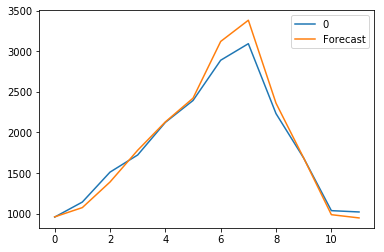

In [62]:
nights_PAC_2016_df.plot(label='Real')
forecast_2016.plot(label='Forecast')
plt.legend()